In [ ]:
# Question 3:

In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   1

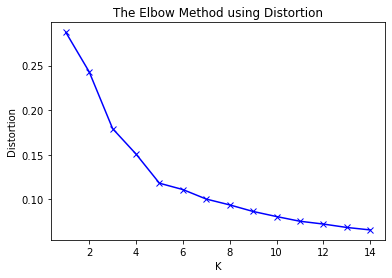

1 : 23.040720326039906
2 : 13.993505283127979
3 : 9.058985215159455
4 : 6.110312266413655
5 : 3.583117905952559
6 : 3.1003435707513742
7 : 2.684861475042586
8 : 2.2210608257935256
9 : 1.880980316789682
10 : 1.6569160919387358
11 : 1.4541310677199424
12 : 1.3010516696581924
13 : 1.2001893151182628
14 : 1.0697865675980471


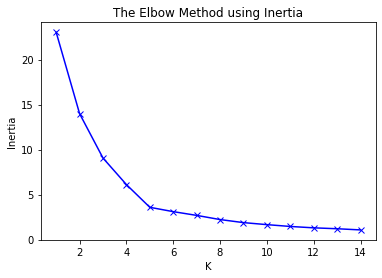

[[0.09265859 0.20319432]
 [0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.6        0.16443149]
 [0.08792846 0.79962894]]


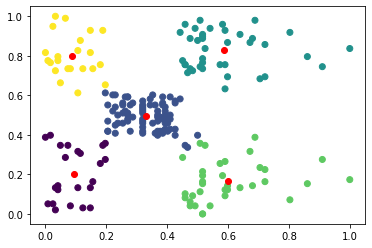

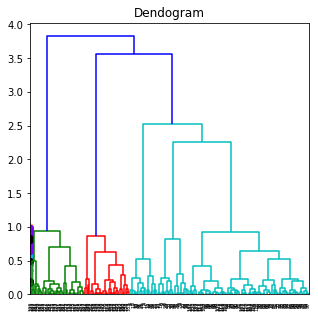

In [2]:
# Importing data

data = pd.read_csv("~/Desktop/Board Infinity/Mall_Customers_BP.csv")
data.head()
df = pd.DataFrame(data)
df.head()
print(df)

# Checking all the data types
df.dtypes

# Part 1 -
# Performing Standard Scaling while pre-processing data
mms = MinMaxScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)']] = mms.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
print(df)

# Part 2 -
# Optimum number of clusters using elbow method -

distortion = []
inertia = []
map1 = {}
map2 = {}
K = range(1, 15)

# Making a separate array file having data for Annual income and Spending score

array1 = df['Annual Income (k$)'].to_numpy()
array2 = df['Spending Score (1-100)'].to_numpy()
array = np.array(list(zip(array1, array2))).reshape(len(array1), 2)

# Building models and fitting them

for k in K:
    kmeansModel = KMeans(n_clusters=k).fit(array)
    kmeansModel.fit(array)

    distortion.append(sum(np.min(cdist(array, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / array.shape[0])
    inertia.append(kmeansModel.inertia_)

    map1[k] = sum(np.min(cdist(array, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / array.shape[0]
    map2[k] = kmeansModel.inertia_

# Using Distortion -
# Tabulating the results -

for key, val in map1.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, distortion, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

# Using distortion, it can be deduced that optimum number of clusters can be 5.

# Using Inertia -
# Tabulating the results -

for key, val in map2.items():
    print(str(key)+' : '+str(val))

# Visualizing the result -

plt.plot(K, inertia, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Using inertia, it can be deduced that optimum number of clusters can be 5.
# From the two graphs, it can be concluded that 5 is the optimum number of cluster for our dataset.

# Part 3 -
data = pd.DataFrame(array, columns=('Annual Income (k$)', 'Spending Score (1-100)'))
data.head()

kmeans = KMeans(n_clusters=5).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

# From the plot, we can say that we would need to concentrate on the three clusters with color:
# violet, green and greenish blue because those are the consumers which have spent more than average.

# Part 4 -
# Drawing dendrogram to find the optimal number of clusters

plt.figure(figsize=(5, 5))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

# From dendrogram, it can be said that optimum number of cluster can be 5

# Part 5 -
# 5 Clusters

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit_predict(data)

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=model.labels_, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black')
plt.show()

# To make more detailed analysis, clustering models for
# (1) Age vs spending (2) Gender vs Spending can also be made.

# From our Income vs Spending clustering model, we can deduce that we need to concentrate more on the three cluster as I have mentioned above.